# 3rd Level Topic Modeling

- After applying the Topic modeling in 2nd level dataset, we get the different sub-topics.
- From the different sub-topics, we choose any particular topic let say we choose diseases topic.
- Now Result of 2nd level topic modeling is become the dataset of 3rd level topic modeling.
- And again apply the Topic modeling but here we choose the particular sub-topic to apply the topic modeling.
- That means we sub-divide only those topic that we want.let say we want to know the news related to health and other filter is, it realted to government then 3rd level topic modeling filter the news and give only those news that related to health and government.

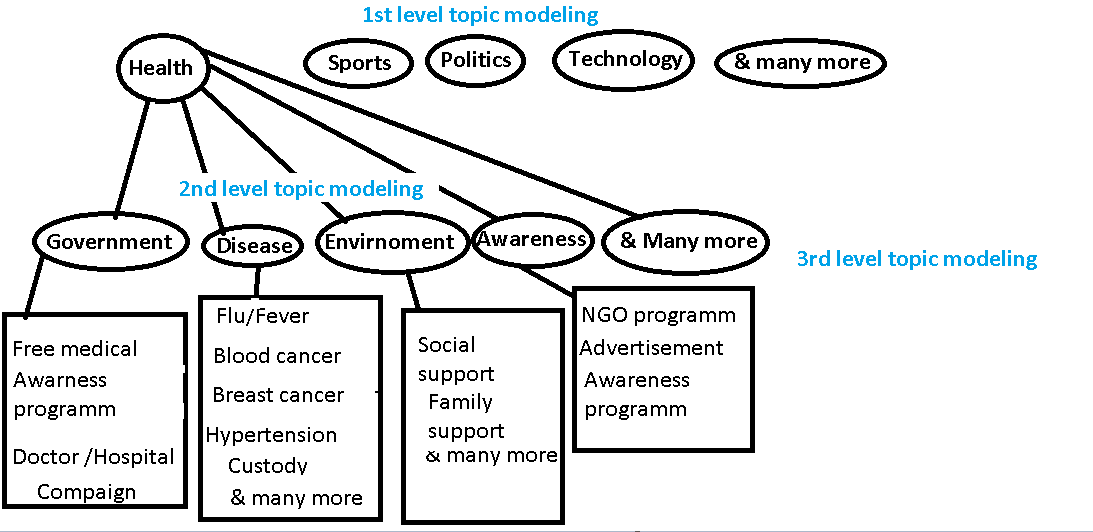

In [0]:
import pandas as pd
data=pd.read_csv('worddoc200-3level.csv',error_bad_lines=False)

In [0]:
data_text = data[['text']]
data_text['index'] = data_text.index
documents = data_text

In [50]:
print(len(documents))
print(documents[:5])

404
                                                text  index
0  flu+bloodcancer+breastcancer+cardiovascular +p...      0
1  hypertention + leukemia + thyroid+insulin+live...      1
2  flu+bloodcancer+breastcancer+cardiovascular +p...      2
3  hypertention + leukemia + thyroid+insulin+live...      3
4  flu+bloodcancer+breastcancer+cardiovascular +p...      4


# Data preprocessing 
## Different process we do here like as Tokenization ,lemetization and stemming the data
- we wanted to convert the data to their normal form for example 'stolen' would converted to steal
### Here nltk is used for removing different language rather than english (Hindi and urdu like that word would be removed)
- In preprocessing actually we remove all the punctuation marks , exclamatory marks and commas 

In [51]:

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
               
            

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Lemmatization 
## Lemmatization is used for gouping of word that's contains the same meaning(synonyms,antonyms)
# Tokenization
## Tokenization is used for keeps the word having meaningfull meaning
- This is used for removal of word like if,the ,a,an that word doesn't make any sense in Topic
# Stemming
## Stemming is used for convert the word into their root form

In [0]:
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

# preview data after preprocessing 
- How the data will look like 

In [53]:
# Select a document to preview after preprocessing
doc_sample = documents[documents['index'] ==10].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))



original document: 
['flu+bloodcancer+breastcancer+cardiovascular', '+prostate', 'cancer+:', '5', '']


 tokenized and lemmatized document: 
['bloodcancer', 'breastcancer', 'cardiovascular', 'prostate', 'cancer']


In [54]:
processed_docs = documents['text'].astype(str).map(preprocess)
processed_docs[:10]

0    [bloodcancer, breastcancer, cardiovascular, pr...
1    [hypertention, leukemia, thyroid, insulin, liv...
2    [bloodcancer, breastcancer, cardiovascular, pr...
3    [hypertention, leukemia, thyroid, insulin, liv...
4    [bloodcancer, breastcancer, cardiovascular, pr...
5    [hypertention, leukemia, thyroid, insulin, liv...
6    [bloodcancer, breastcancer, cardiovascular, pr...
7    [hypertention, leukemia, thyroid, insulin, liv...
8    [bloodcancer, breastcancer, cardiovascular, pr...
9    [hypertention, leukemia, thyroid, insulin, liv...
Name: text, dtype: object

### Dictionary is formed for 

In [55]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 bloodcancer
1 breastcancer
2 cancer
3 cardiovascular
4 prostate
5 arthritis
6 cruise
7 doctor
8 families
9 hall
10 hypertention


In [0]:
#To limitised the word by its occurance, you can use the below line.
#dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [56]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[10]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]

In [0]:
import pickle
pickle.dump(bow_corpus, open('bow_corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [58]:
bow_doc_4310 = bow_corpus[10]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 0 ("bloodcancer") appears 1 time.
Word 1 ("breastcancer") appears 1 time.
Word 2 ("cancer") appears 1 time.
Word 3 ("cardiovascular") appears 1 time.
Word 4 ("prostate") appears 1 time.


In [59]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.4484840852302152),
 (1, 0.4484840852302152),
 (2, 0.44209512684587277),
 (3, 0.4484840852302152),
 (4, 0.4484840852302152)]


In [60]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
lda_model.save('model10.gensim')

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [61]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.175*"breastcancer" + 0.175*"bloodcancer" + 0.175*"cancer" + 0.175*"cardiovascular" + 0.175*"prostate" + 0.002*"members" + 0.002*"custody" + 0.002*"coach" + 0.002*"rape" + 0.002*"leak"
Topic: 1 
Words: 0.030*"arthritis" + 0.030*"leukemia" + 0.030*"doctor" + 0.029*"thyroid" + 0.029*"liverdamage" + 0.029*"hypertention" + 0.029*"precautions" + 0.029*"insulin" + 0.027*"bloodcancer" + 0.027*"breastcancer"
Topic: 2 
Words: 0.036*"cancer" + 0.035*"breastcancer" + 0.035*"cardiovascular" + 0.035*"bloodcancer" + 0.035*"prostate" + 0.031*"blood" + 0.023*"arthritis" + 0.023*"insulin" + 0.022*"hypertention" + 0.022*"leukemia"
Topic: 3 
Words: 0.039*"liverdamage" + 0.039*"hypertention" + 0.038*"insulin" + 0.038*"arthritis" + 0.037*"thyroid" + 0.037*"leukemia" + 0.033*"medicine" + 0.033*"support" + 0.032*"symptom" + 0.032*"government"
Topic: 4 
Words: 0.045*"cost" + 0.044*"effect" + 0.044*"doctor" + 0.043*"thyroid" + 0.043*"arthritis" + 0.043*"leukemia" + 0.043*"hypertention" + 0.04

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
lda_model.save('model10.gensim')
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))


In [62]:
processed_docs[10]

['bloodcancer', 'breastcancer', 'cardiovascular', 'prostate', 'cancer']

In [64]:
unseen_document = 'cancer '
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 10)))

Score: 0.5499823689460754	 Topic: 0.175*"breastcancer" + 0.175*"bloodcancer" + 0.175*"cancer" + 0.175*"cardiovascular" + 0.175*"prostate" + 0.002*"members" + 0.002*"custody" + 0.002*"coach" + 0.002*"rape" + 0.002*"leak"
Score: 0.05000605806708336	 Topic: 0.049*"cancer" + 0.039*"bloodcancer" + 0.039*"prostate" + 0.038*"breastcancer" + 0.038*"cardiovascular" + 0.016*"leukemia" + 0.016*"arthritis" + 0.016*"thyroid" + 0.015*"insulin" + 0.015*"liverdamage"
Score: 0.05000443756580353	 Topic: 0.036*"cancer" + 0.035*"breastcancer" + 0.035*"cardiovascular" + 0.035*"bloodcancer" + 0.035*"prostate" + 0.031*"blood" + 0.023*"arthritis" + 0.023*"insulin" + 0.022*"hypertention" + 0.022*"leukemia"
Score: 0.050003133714199066	 Topic: 0.030*"arthritis" + 0.030*"leukemia" + 0.030*"doctor" + 0.029*"thyroid" + 0.029*"liverdamage" + 0.029*"hypertention" + 0.029*"precautions" + 0.029*"insulin" + 0.027*"bloodcancer" + 0.027*"breastcancer"
Score: 0.050001781433820724	 Topic: 0.039*"liverdamage" + 0.039*"hypert

In [69]:
unseen_document = 'expiry medicine cause death and several problem'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 10)))

Score: 0.6999813914299011	 Topic: 0.060*"blood" + 0.033*"thyroid" + 0.033*"medicine" + 0.033*"leukemia" + 0.033*"hypertention" + 0.032*"arthritis" + 0.032*"insulin" + 0.032*"liverdamage" + 0.031*"aid" + 0.031*"corn"
Score: 0.03333986923098564	 Topic: 0.039*"liverdamage" + 0.039*"hypertention" + 0.038*"insulin" + 0.038*"arthritis" + 0.037*"thyroid" + 0.037*"leukemia" + 0.033*"medicine" + 0.033*"support" + 0.032*"symptom" + 0.032*"government"
Score: 0.03333946317434311	 Topic: 0.036*"cancer" + 0.035*"breastcancer" + 0.035*"cardiovascular" + 0.035*"bloodcancer" + 0.035*"prostate" + 0.031*"blood" + 0.023*"arthritis" + 0.023*"insulin" + 0.022*"hypertention" + 0.022*"leukemia"
Score: 0.033336784690618515	 Topic: 0.045*"cost" + 0.044*"effect" + 0.044*"doctor" + 0.043*"thyroid" + 0.043*"arthritis" + 0.043*"leukemia" + 0.043*"hypertention" + 0.043*"insulin" + 0.043*"liverdamage" + 0.040*"campaign"
Score: 0.03333481773734093	 Topic: 0.049*"cancer" + 0.039*"bloodcancer" + 0.039*"prostate" + 0.038

### As previous, we also increase the  topic for seeing the syncronization of topics

In [0]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('bow_corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model10.gensim')


In [67]:
#!pip install pyLDAvis
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


### Result something look like this...

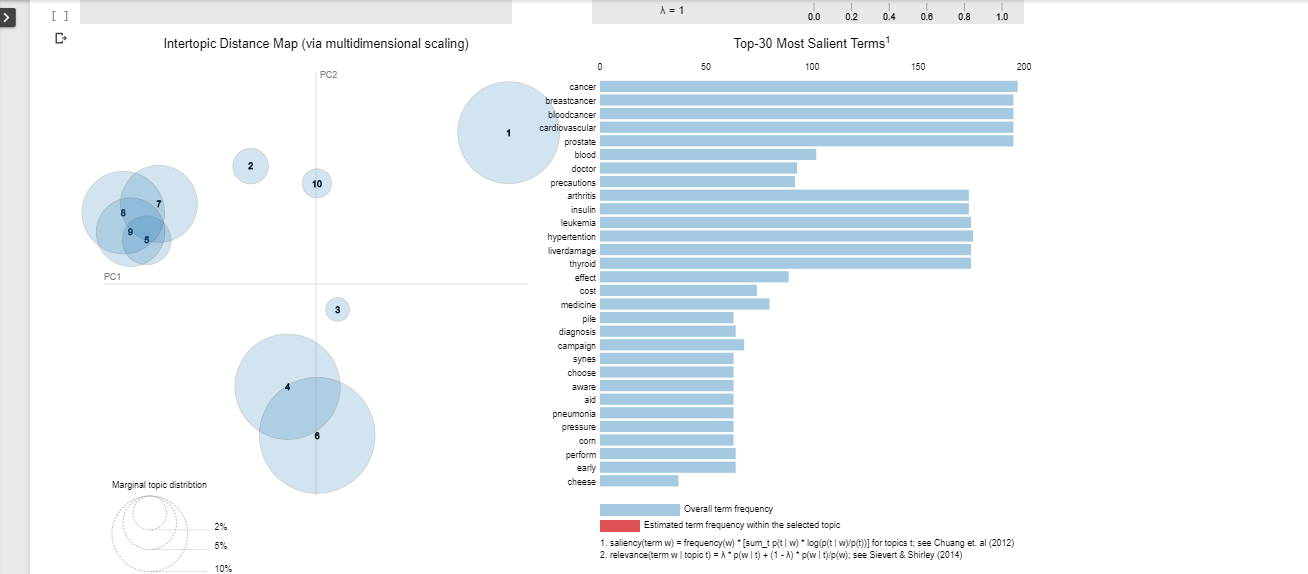

### Above task is for sub -topic Dieases, we also apply for different sub topics like Government, Awareness, Environments etc., and analyse the different subtopics.

## !!!That's All Our Project is !!!

## For further more deatils on this you can read my Thesis on this.

# Thank you !!